In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


### Load the data

In [2]:
bottle = pd.read_csv('bottle.csv')

/home/alpay/miniconda3/envs/ml/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
bottle.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
bottle = bottle[['Depthm','Salnty','STheta', 'T_degC']]
bottle.columns = ['Depth','Salnty','STheta', 'Temp']

### 4 parameters that we are interested in are chosen to se

In [5]:
bottle.head()

,Depth,Salnty,STheta,Temp
0,0,33.440,25.649,10.50
1,8,33.440,25.656,10.46
2,10,33.437,25.654,10.46
3,19,33.420,25.643,10.45
4,20,33.421,25.643,10.45


### Lets see how many NaN values we have: 

In [6]:
bottle.isnull().sum()

Depth         0
Salnty    47354
STheta    52689
Temp      10963
dtype: int64

### Clear the NaN values

In [7]:
bottle.dropna(inplace=True)

In [8]:
bottle.isnull().sum()

Depth     0
Salnty    0
STheta    0
Temp      0
dtype: int64

### Choose our predictors and target

In [18]:
x = bottle[['Depth','Salnty','STheta']]
y = bottle[['Temp']]

### Normalize

In [19]:
x_norm = (x - x.mean()) / x.std()
x_norm.head()

,Depth,Salnty,STheta
0,-0.720370,-0.871866,-0.145912
1,-0.694461,-0.871866,-0.139917
2,-0.687984,-0.878365,-0.141630
3,-0.658837,-0.915196,-0.151050
4,-0.655599,-0.913030,-0.151050


### Lets visualize predictors vs target

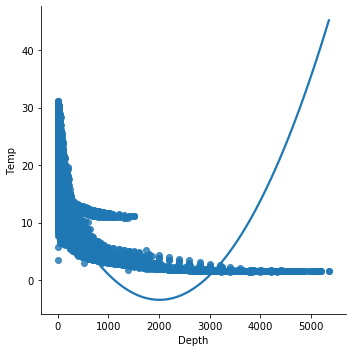

In [27]:
sns.lmplot(x="Depth", y="Temp", data=bottle,
           order=2, ci=None)

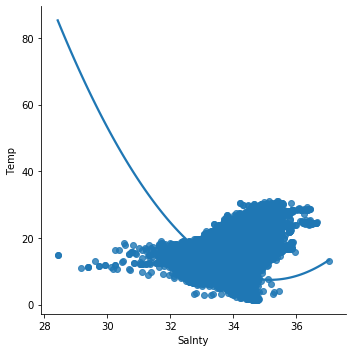

In [28]:
sns.lmplot(x="Salnty", y="Temp", data=bottle,
           order=2, ci=None)

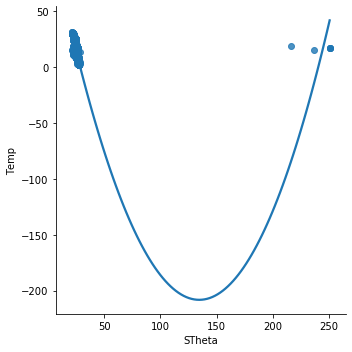

In [29]:
sns.lmplot(x="STheta", y="Temp", data=bottle,
           order=2, ci=None)

### To be used later for input shape in the NN model

In [22]:
n_cols = x_norm.shape[1]

In [23]:
n_cols

3

### Create the Regression NN Model

In [30]:
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [31]:
model = regression_model()

### Using 30% as valuidation data and 5 epochs, lets fit the model:

In [32]:
model.fit(x_norm, y, validation_split=0.3, epochs=5, verbose=2)

Train on 568521 samples, validate on 243653 samples
Epoch 1/5
 - 114s - loss: 0.5343 - val_loss: 2.7699
Epoch 2/5
 - 100s - loss: 0.0014 - val_loss: 2.5175
Epoch 3/5
 - 145s - loss: 9.9115e-04 - val_loss: 2.0807
Epoch 4/5
 - 89s - loss: 7.3774e-04 - val_loss: 1.8271
Epoch 5/5
 - 123s - loss: 5.8319e-04 - val_loss: 1.8394
